In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1, -2, -1 ,-1 ,1, 2, -1, 2, 0, -2, -1, 0, 2, 2, 1]).reshape((3,5))
y = np.array([-7, -1, -1]).reshape((3,1))
w0 = np.array([0, 0, 0, 0, 0]).reshape((5,1))

In [6]:
def loss_func(pred, y):
    return np.sum((pred - y) ** 2)

def gradient(pred, x, y):
    return 2 * (pred - y) * x

def optimizer(w, lr, grad):
    return w - lr * grad

def prune(w):
    thresh = np.sort(np.abs(w))[1]
    mask = np.abs(w) <= thresh
    w = w * (1 - mask)
    return w

def loss_func_l1(pred, y, strength, w):
    return np.sum((pred - y) ** 2) + strength * np.sum(np.abs(w))

def gradient_l1(pred, x, y, w, strength):
    return 2 * (pred - y) * x + strength * np.sign(w).reshape(1,5)

def proximal_l1(w_i, strength, lr):
    if w_i > lr * strength:
        return w_i - lr * strength
    if w_i >= - lr * strength and w_i <= lr * strength:
        return 0
    if w_i < - lr * strength:
        return w_i + lr * strength
    
def loss_func_trim_l1(pred, y, strength, w):
    thresh = np.sort(np.abs(w))[2]
    #ind = np.where(np.abs(w) > thresh)
    mask = np.abs(w) <= thresh
    #mask = np.sign(w * mask) * strength
    #mask[ind] = 1
    #reg = np.sum(w * mask)
    return np.sum((pred - y) ** 2) + strength * np.sum(np.abs(w) * mask)

def gradient_trim_l1(pred, x, y, w, strength):
    thresh = np.sort(np.abs(w))[2]
    mask = np.abs(w) <= thresh
    return 2 * (pred - y) * x + strength * (np.sign(w) * mask).reshape(1,5)

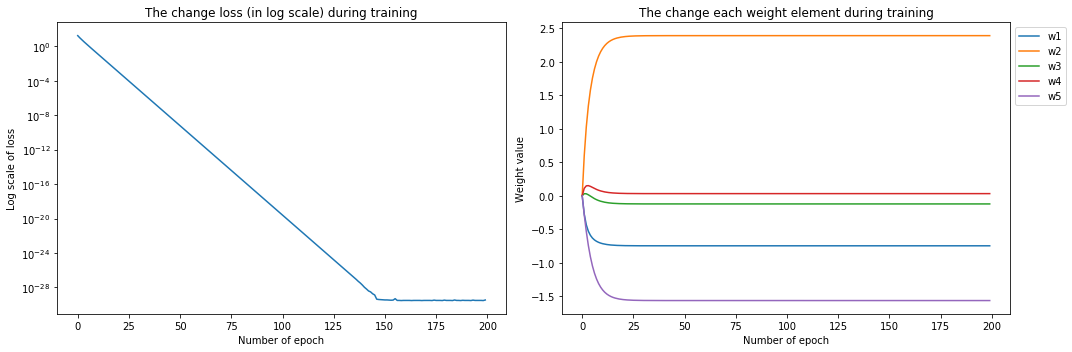

In [85]:
# Train without regularization

w = w0
lr = 0.02
loss_lst = []
w_lst = []

for i in range(200):
    w_lst.append(w.ravel().tolist())
    total_loss = 0
    
    for inputs, labels in zip(x, y):
        pred = np.dot(inputs,w)
        grad = gradient(pred, inputs, labels)
        loss = loss_func(pred, labels)
        total_loss += loss
        w = optimizer(w, lr, grad.reshape(5,1))
    
    avg_loss = total_loss / len(x)
    loss_lst.append(avg_loss)
    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
cols = []

axes[0].plot(np.array(range(200)), loss_lst)
axes[0].set_xlabel('Number of epoch')
axes[0].set_ylabel('Log scale of loss')
axes[0].set_yscale('log')
cols.append('The change loss (in log scale) during training')

w_arr = np.array(w_lst)

axes[1].plot(np.array(range(200)), w_arr[:,0], label='w1')
axes[1].plot(np.array(range(200)), w_arr[:,1], label='w2')
axes[1].plot(np.array(range(200)), w_arr[:,2], label='w3')
axes[1].plot(np.array(range(200)), w_arr[:,3], label='w4')
axes[1].plot(np.array(range(200)), w_arr[:,4], label='w5')
axes[1].set_xlabel('Number of epoch')
axes[1].set_ylabel('Weight value')
axes[1].legend(bbox_to_anchor=(1, 1), loc='upper left')
cols.append('The change each weight element during training')

for ax1, col in zip(axes.ravel(), cols):
    ax1.set_title(col, fontsize=12)
    
fig.tight_layout()
plt.show()

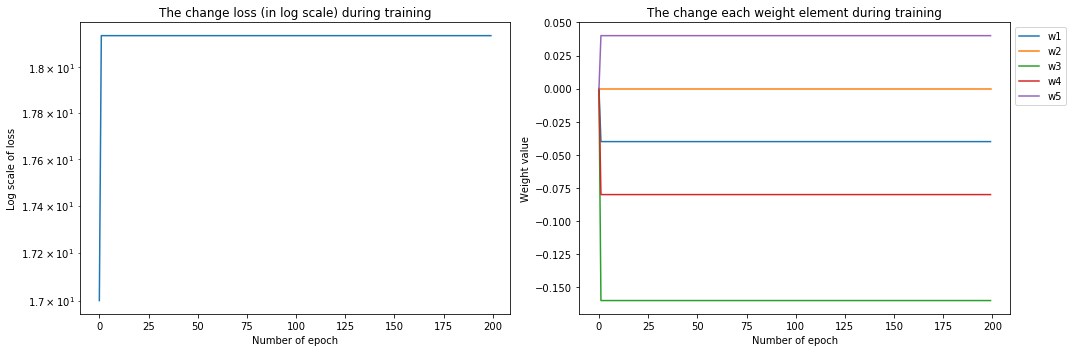

In [7]:
# Train with l0 norm

w = w0
lr = 0.02
loss_lst = []
w_lst = []

for i in range(200):
    w_lst.append(w.ravel().tolist())
    total_loss = 0
    
    for inputs, labels in zip(x, y):
        pred = np.dot(inputs,w)
        grad = gradient(pred, inputs, labels)
        loss = loss_func(pred, labels)
        total_loss += loss
        w = optimizer(w, lr, grad.reshape(5,1))
        w = prune(w)
    
    avg_loss = total_loss / len(x)
    loss_lst.append(avg_loss)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
cols = []

axes[0].plot(np.array(range(200)), loss_lst)
axes[0].set_xlabel('Number of epoch')
axes[0].set_ylabel('Log scale of loss')
axes[0].set_yscale('log')
cols.append('The change loss (in log scale) during training')

w_arr = np.array(w_lst)

axes[1].plot(np.array(range(200)), w_arr[:,0], label='w1')
axes[1].plot(np.array(range(200)), w_arr[:,1], label='w2')
axes[1].plot(np.array(range(200)), w_arr[:,2], label='w3')
axes[1].plot(np.array(range(200)), w_arr[:,3], label='w4')
axes[1].plot(np.array(range(200)), w_arr[:,4], label='w5')
axes[1].set_xlabel('Number of epoch')
axes[1].set_ylabel('Weight value')
axes[1].legend(bbox_to_anchor=(1, 1), loc='upper left')
cols.append('The change each weight element during training')

for ax1, col in zip(axes.ravel(), cols):
    ax1.set_title(col, fontsize=12)
    
fig.tight_layout()
plt.show()

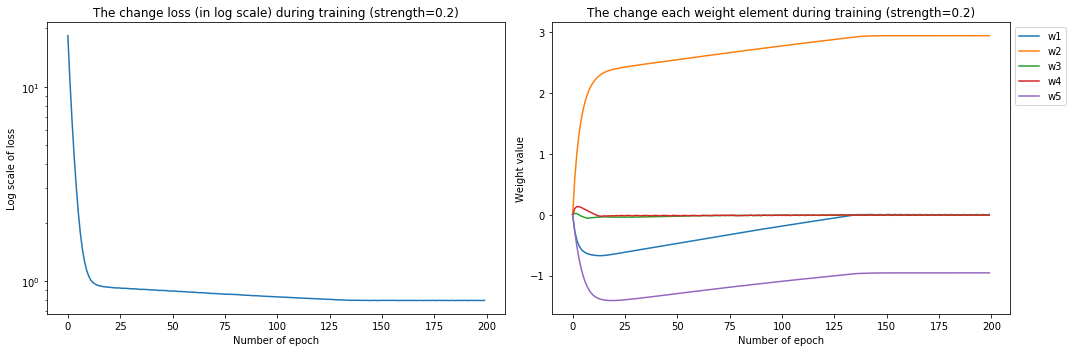

Converged loss: 0.7935488683623984


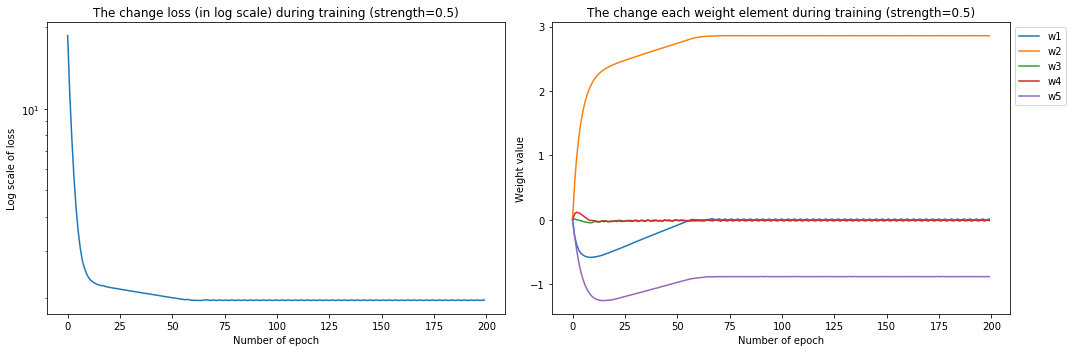

Converged loss: 1.9601193808464021


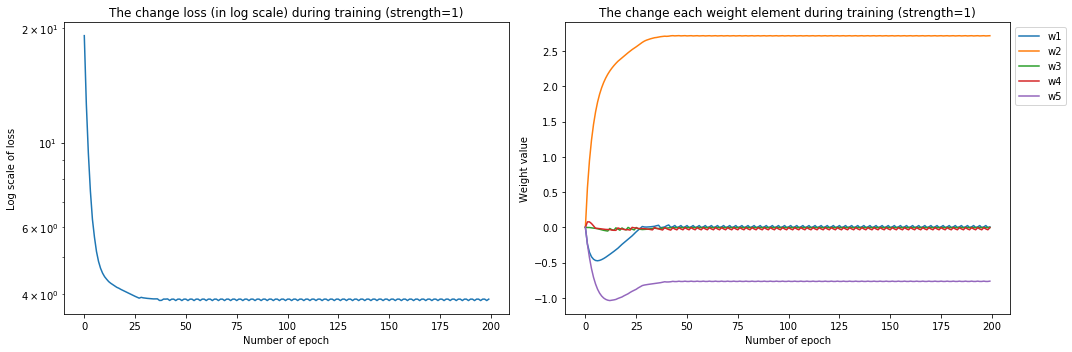

Converged loss: 3.840662097050569


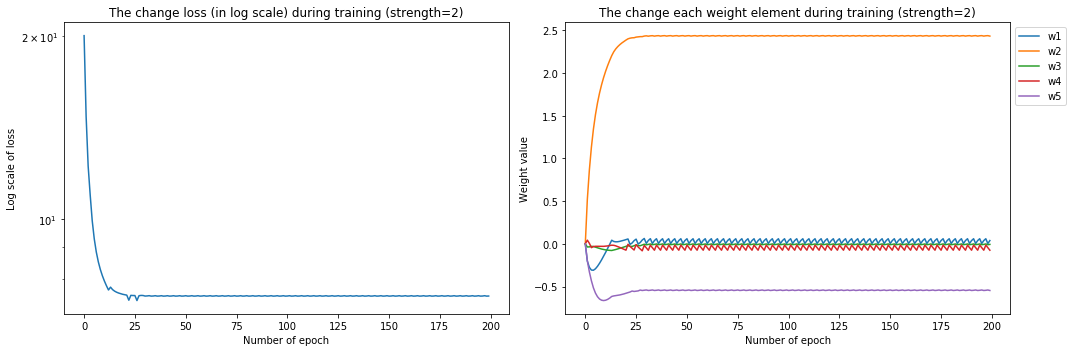

Converged loss: 7.361812249559914


In [8]:
# Trained with l1 norm by different strength

w = w0
lr = 0.02
loss_lst = []
w_lst = []
strength_lst = [0.2, 0.5, 1, 2]

for strength in strength_lst:
    w = w0
    lr = 0.02
    loss_lst = []
    w_lst = []
    for i in range(200):
        w_lst.append(w.ravel().tolist())
        total_loss = 0

        for inputs, labels in zip(x, y):
            pred = np.dot(inputs,w)
            grad = gradient_l1(pred, inputs, labels, w, strength)
            #print(grad)
            loss = loss_func_l1(pred, labels, strength, w)
            total_loss += loss
            w = optimizer(w, lr, grad.reshape(5,1))

        avg_loss = total_loss / len(x)
        loss_lst.append(avg_loss)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    cols = []

    axes[0].plot(np.array(range(200)), loss_lst)
    axes[0].set_xlabel('Number of epoch')
    axes[0].set_ylabel('Log scale of loss')
    axes[0].set_yscale('log')
    cols.append('The change loss (in log scale) during training (strength=' + str(strength) + ')')

    w_arr = np.array(w_lst)

    axes[1].plot(np.array(range(200)), w_arr[:,0], label='w1')
    axes[1].plot(np.array(range(200)), w_arr[:,1], label='w2')
    axes[1].plot(np.array(range(200)), w_arr[:,2], label='w3')
    axes[1].plot(np.array(range(200)), w_arr[:,3], label='w4')
    axes[1].plot(np.array(range(200)), w_arr[:,4], label='w5')
    axes[1].set_xlabel('Number of epoch')
    axes[1].set_ylabel('Weight value')
    axes[1].legend(bbox_to_anchor=(1, 1), loc='upper left')
    cols.append('The change each weight element during training (strength=' + str(strength) + ')')

    for ax1, col in zip(axes.ravel(), cols):
        ax1.set_title(col, fontsize=12)

    fig.tight_layout()
    plt.show()
    print('Converged loss:', np.array(loss_lst).min())

In [ ]:
loss

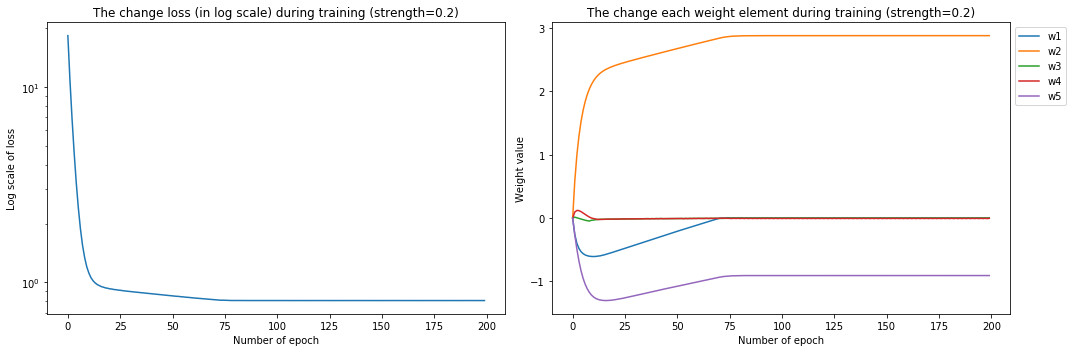

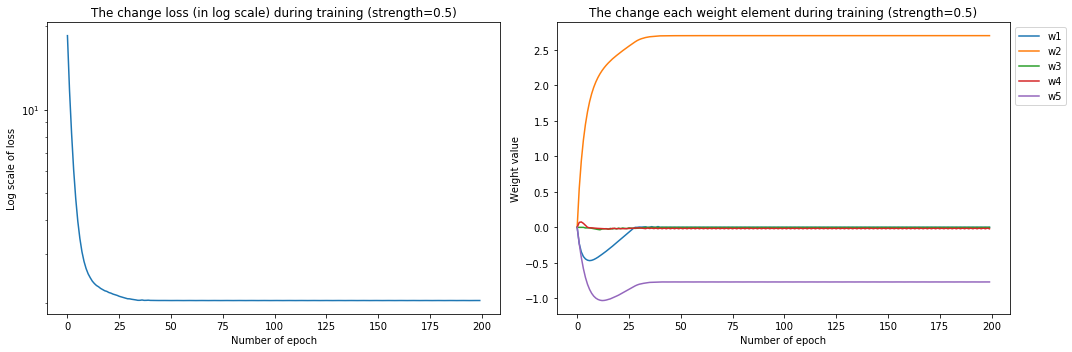

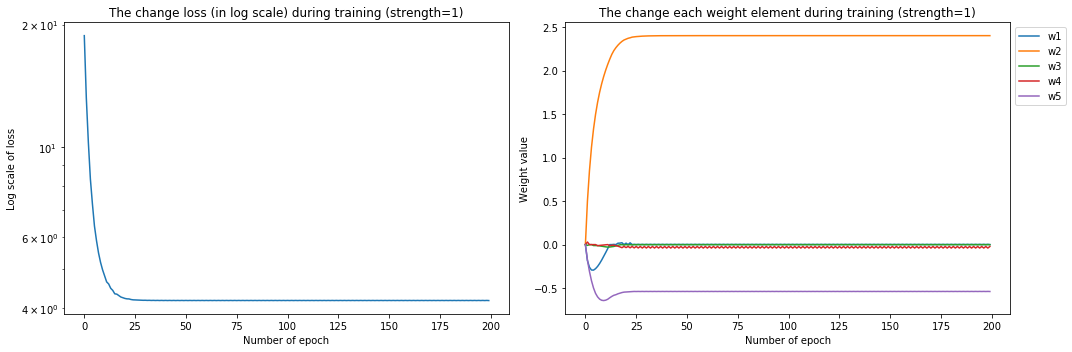

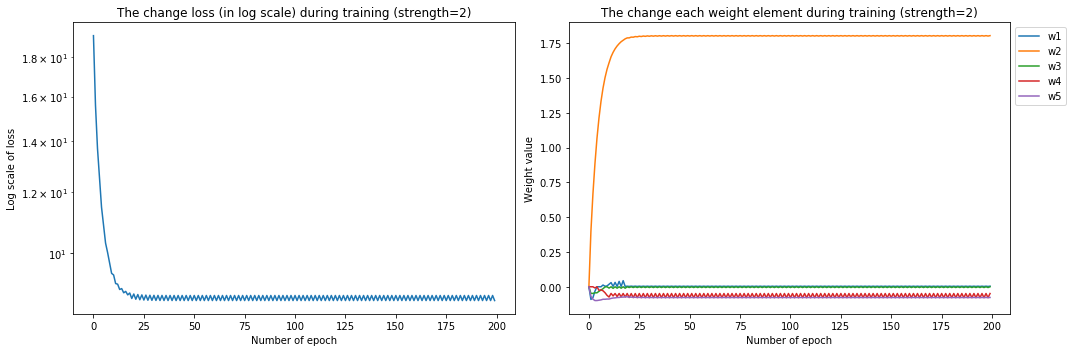

In [89]:
# Proximal l1 regularization

w = w0
lr = 0.02
loss_lst = []
w_lst = []
strength_lst = [0.2, 0.5, 1, 2]

for strength in strength_lst:
    w = w0
    lr = 0.02
    loss_lst = []
    w_lst = []
    for i in range(200):
        w_lst.append(w.ravel().tolist())
        total_loss = 0

        for inputs, labels in zip(x, y):
            pred = np.dot(inputs,w)
            grad = gradient_l1(pred, inputs, labels, w, strength)
            #print(grad)
            loss = loss_func_l1(pred, labels, strength, w)
            total_loss += loss
            w = optimizer(w, lr, grad.reshape(5,1))
            
            w_u = np.zeros(w.shape)
            for ind, w_i in zip(list(range(0,5)), w):
                w_i = proximal_l1(w_i, strength, lr)
                w_u[ind] = w_i
            w = w_u
            
        avg_loss = total_loss / len(x)
        loss_lst.append(avg_loss)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    cols = []

    axes[0].plot(np.array(range(200)), loss_lst)
    axes[0].set_xlabel('Number of epoch')
    axes[0].set_ylabel('Log scale of loss')
    axes[0].set_yscale('log')
    cols.append('The change loss (in log scale) during training (strength=' + str(strength) + ')')

    w_arr = np.array(w_lst)

    axes[1].plot(np.array(range(200)), w_arr[:,0], label='w1')
    axes[1].plot(np.array(range(200)), w_arr[:,1], label='w2')
    axes[1].plot(np.array(range(200)), w_arr[:,2], label='w3')
    axes[1].plot(np.array(range(200)), w_arr[:,3], label='w4')
    axes[1].plot(np.array(range(200)), w_arr[:,4], label='w5')
    axes[1].set_xlabel('Number of epoch')
    axes[1].set_ylabel('Weight value')
    axes[1].legend(bbox_to_anchor=(1, 1), loc='upper left')
    cols.append('The change each weight element during training (strength=' + str(strength) + ')')

    for ax1, col in zip(axes.ravel(), cols):
        ax1.set_title(col, fontsize=12)

    fig.tight_layout()
    plt.show()

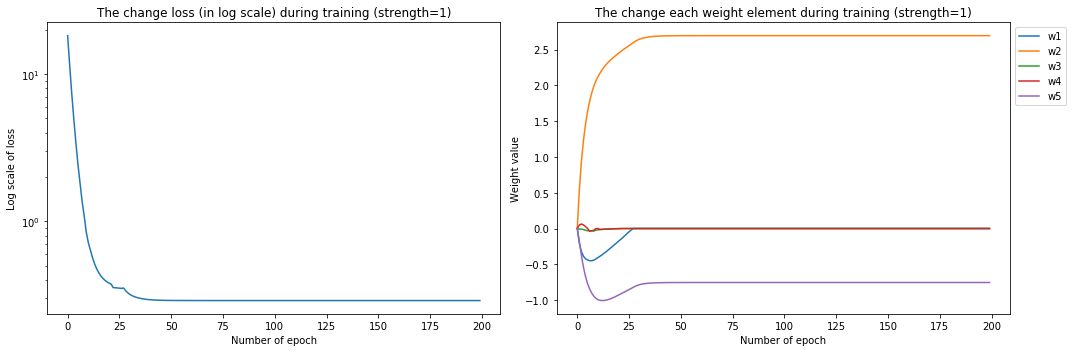

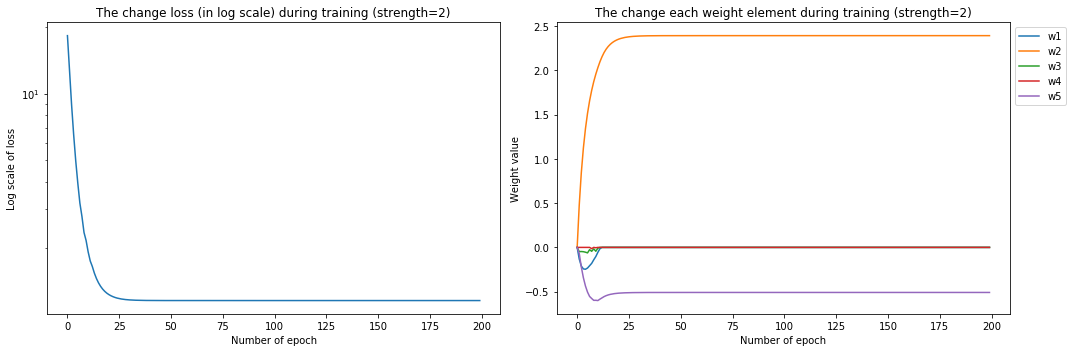

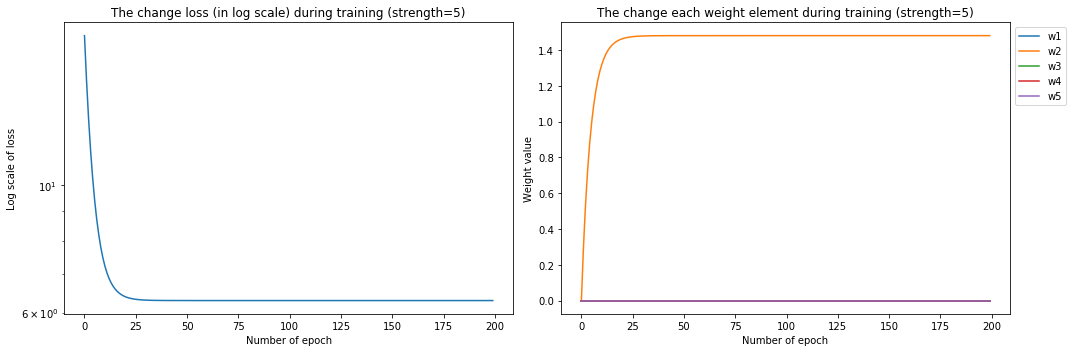

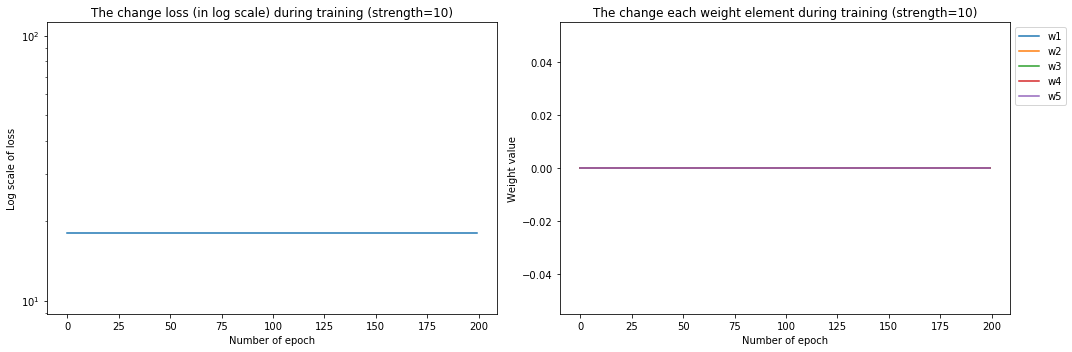

In [90]:
# Trim l1 regularization

w = w0
lr = 0.02
loss_lst = []
w_lst = []
strength_lst = [1, 2, 5, 10]

for strength in strength_lst:
    w = w0
    lr = 0.02
    loss_lst = []
    w_lst = []
    for i in range(200):
        w_lst.append(w.ravel().tolist())
        total_loss = 0

        for inputs, labels in zip(x, y):
            pred = np.dot(inputs, w)
            grad = gradient_trim_l1(pred, inputs, labels, w, strength)
            loss = loss_func_trim_l1(pred, labels, strength, w)
            total_loss += loss
            w = optimizer(w, lr, grad.reshape(5,1))

            w_u = np.zeros(w.shape)
            for ind, w_i in zip(list(range(0,5)), w):
                w_i = proximal_l1(w_i, strength, lr)
                w_u[ind] = w_i
            w = w_u

        avg_loss = total_loss / len(x)
        loss_lst.append(avg_loss)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    cols = []

    axes[0].plot(np.array(range(200)), loss_lst)
    axes[0].set_xlabel('Number of epoch')
    axes[0].set_ylabel('Log scale of loss')
    axes[0].set_yscale('log')
    cols.append('The change loss (in log scale) during training (strength=' + str(strength) + ')')

    w_arr = np.array(w_lst)

    axes[1].plot(np.array(range(200)), w_arr[:,0], label='w1')
    axes[1].plot(np.array(range(200)), w_arr[:,1], label='w2')
    axes[1].plot(np.array(range(200)), w_arr[:,2], label='w3')
    axes[1].plot(np.array(range(200)), w_arr[:,3], label='w4')
    axes[1].plot(np.array(range(200)), w_arr[:,4], label='w5')
    axes[1].set_xlabel('Number of epoch')
    axes[1].set_ylabel('Weight value')
    axes[1].legend(bbox_to_anchor=(1, 1), loc='upper left')
    cols.append('The change each weight element during training (strength=' + str(strength) + ')')

    for ax1, col in zip(axes.ravel(), cols):
        ax1.set_title(col, fontsize=12)

    fig.tight_layout()
    plt.show()

In [97]:
x = np.array([1, -2, -1 ,-1 ,1, 2, -1, 2, 0, -2]).reshape((2,5))
y = np.array([-7, -1]).reshape((2,1))
w0 = np.array([0, 0, 0, 0, 0]).reshape((5,1))

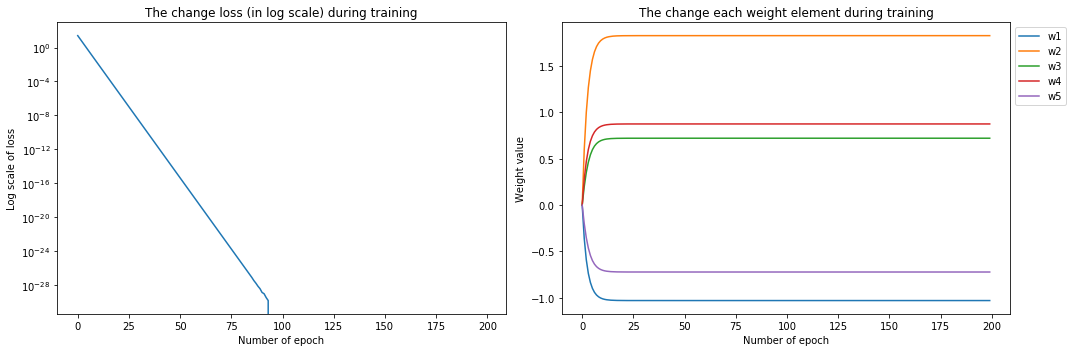

In [92]:
# Train without regularization

w = w0
lr = 0.02
loss_lst = []
w_lst = []

for i in range(200):
    w_lst.append(w.ravel().tolist())
    total_loss = 0
    
    for inputs, labels in zip(x, y):
        pred = np.dot(inputs,w)
        grad = gradient(pred, inputs, labels)
        loss = loss_func(pred, labels)
        total_loss += loss
        w = optimizer(w, lr, grad.reshape(5,1))
    
    avg_loss = total_loss / len(x)
    loss_lst.append(avg_loss)
    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
cols = []

axes[0].plot(np.array(range(200)), loss_lst)
axes[0].set_xlabel('Number of epoch')
axes[0].set_ylabel('Log scale of loss')
axes[0].set_yscale('log')
cols.append('The change loss (in log scale) during training')

w_arr = np.array(w_lst)

axes[1].plot(np.array(range(200)), w_arr[:,0], label='w1')
axes[1].plot(np.array(range(200)), w_arr[:,1], label='w2')
axes[1].plot(np.array(range(200)), w_arr[:,2], label='w3')
axes[1].plot(np.array(range(200)), w_arr[:,3], label='w4')
axes[1].plot(np.array(range(200)), w_arr[:,4], label='w5')
axes[1].set_xlabel('Number of epoch')
axes[1].set_ylabel('Weight value')
axes[1].legend(bbox_to_anchor=(1, 1), loc='upper left')
cols.append('The change each weight element during training')

for ax1, col in zip(axes.ravel(), cols):
    ax1.set_title(col, fontsize=12)
    
fig.tight_layout()
plt.show()

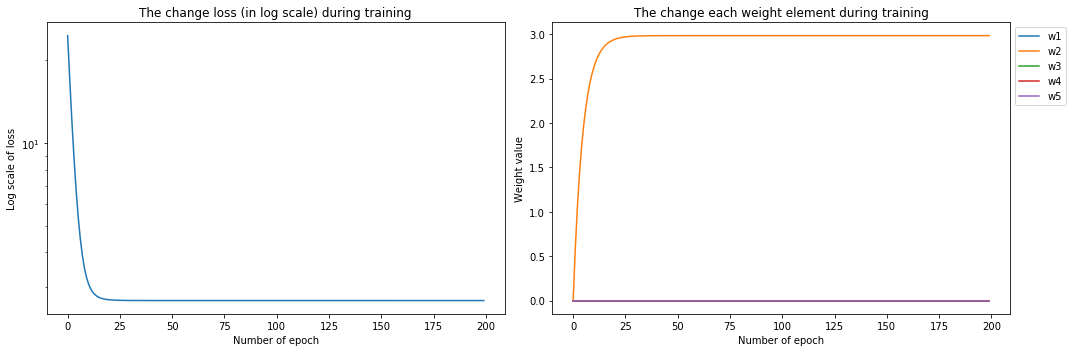

In [93]:
# Train with l0 norm

w = w0
lr = 0.02
loss_lst = []
w_lst = []

for i in range(200):
    w_lst.append(w.ravel().tolist())
    total_loss = 0
    
    for inputs, labels in zip(x, y):
        pred = np.dot(inputs,w)
        grad = gradient(pred, inputs, labels)
        loss = loss_func(pred, labels)
        total_loss += loss
        w = optimizer(w, lr, grad.reshape(5,1))
        w = prune(w)
    
    avg_loss = total_loss / len(x)
    loss_lst.append(avg_loss)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
cols = []

axes[0].plot(np.array(range(200)), loss_lst)
axes[0].set_xlabel('Number of epoch')
axes[0].set_ylabel('Log scale of loss')
axes[0].set_yscale('log')
cols.append('The change loss (in log scale) during training')

w_arr = np.array(w_lst)

axes[1].plot(np.array(range(200)), w_arr[:,0], label='w1')
axes[1].plot(np.array(range(200)), w_arr[:,1], label='w2')
axes[1].plot(np.array(range(200)), w_arr[:,2], label='w3')
axes[1].plot(np.array(range(200)), w_arr[:,3], label='w4')
axes[1].plot(np.array(range(200)), w_arr[:,4], label='w5')
axes[1].set_xlabel('Number of epoch')
axes[1].set_ylabel('Weight value')
axes[1].legend(bbox_to_anchor=(1, 1), loc='upper left')
cols.append('The change each weight element during training')

for ax1, col in zip(axes.ravel(), cols):
    ax1.set_title(col, fontsize=12)
    
fig.tight_layout()
plt.show()

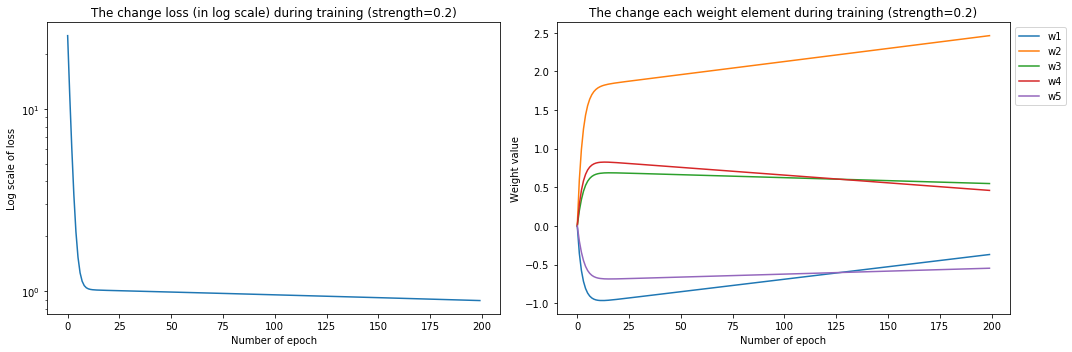

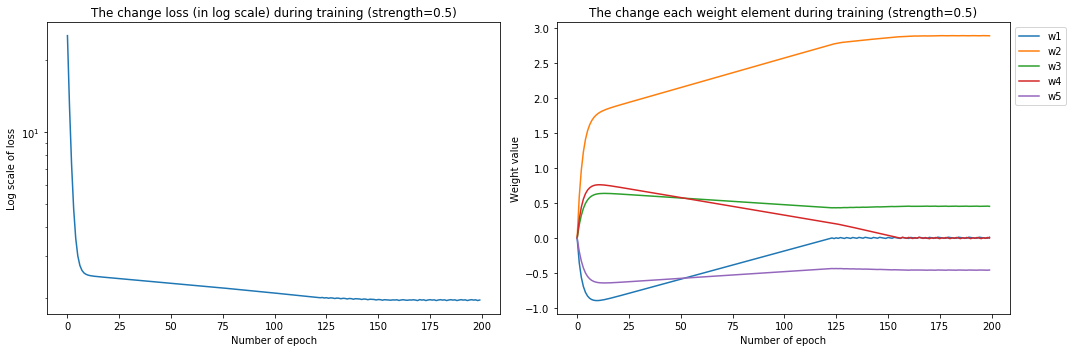

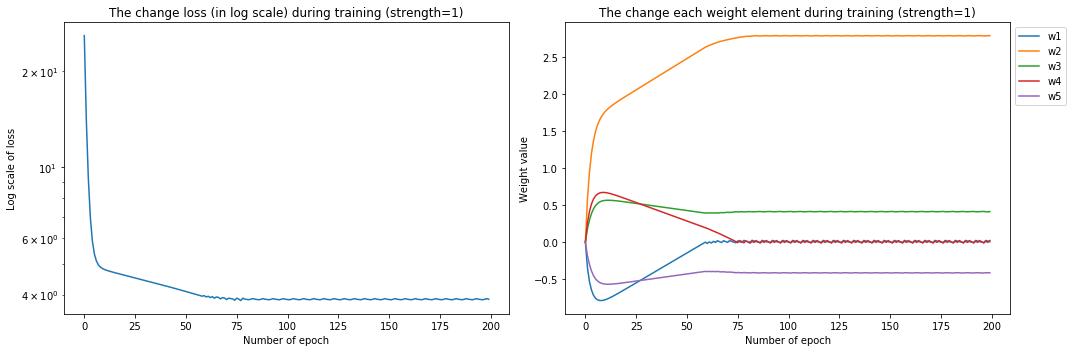

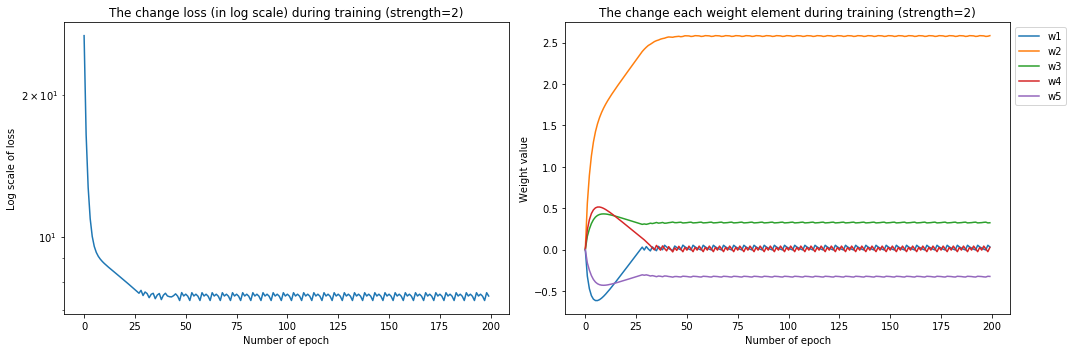

In [98]:
# Trained with l1 norm by different strength

w = w0
lr = 0.02
loss_lst = []
w_lst = []
strength_lst = [0.2, 0.5, 1, 2]

for strength in strength_lst:
    w = w0
    lr = 0.02
    loss_lst = []
    w_lst = []
    for i in range(200):
        w_lst.append(w.ravel().tolist())
        total_loss = 0

        for inputs, labels in zip(x, y):
            pred = np.dot(inputs,w)
            grad = gradient_l1(pred, inputs, labels, w, strength)
            #print(grad)
            loss = loss_func_l1(pred, labels, strength, w)
            total_loss += loss
            w = optimizer(w, lr, grad.reshape(5,1))

        avg_loss = total_loss / len(x)
        loss_lst.append(avg_loss)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    cols = []

    axes[0].plot(np.array(range(200)), loss_lst)
    axes[0].set_xlabel('Number of epoch')
    axes[0].set_ylabel('Log scale of loss')
    axes[0].set_yscale('log')
    cols.append('The change loss (in log scale) during training (strength=' + str(strength) + ')')

    w_arr = np.array(w_lst)

    axes[1].plot(np.array(range(200)), w_arr[:,0], label='w1')
    axes[1].plot(np.array(range(200)), w_arr[:,1], label='w2')
    axes[1].plot(np.array(range(200)), w_arr[:,2], label='w3')
    axes[1].plot(np.array(range(200)), w_arr[:,3], label='w4')
    axes[1].plot(np.array(range(200)), w_arr[:,4], label='w5')
    axes[1].set_xlabel('Number of epoch')
    axes[1].set_ylabel('Weight value')
    axes[1].legend(bbox_to_anchor=(1, 1), loc='upper left')
    cols.append('The change each weight element during training (strength=' + str(strength) + ')')

    for ax1, col in zip(axes.ravel(), cols):
        ax1.set_title(col, fontsize=12)

    fig.tight_layout()
    plt.show()

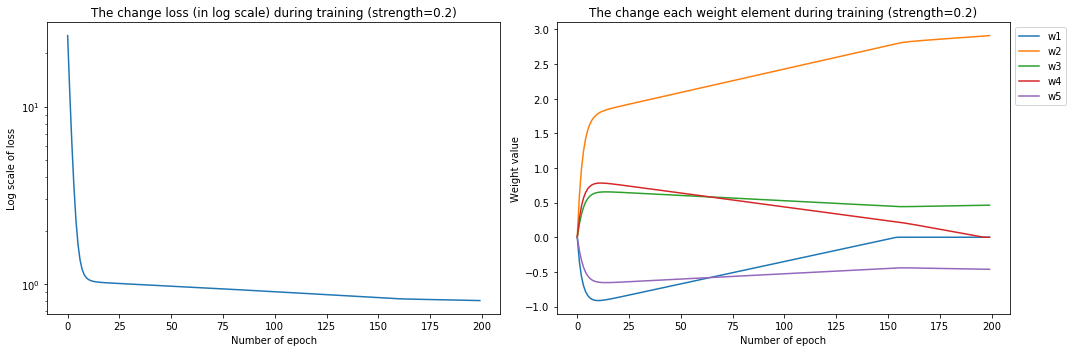

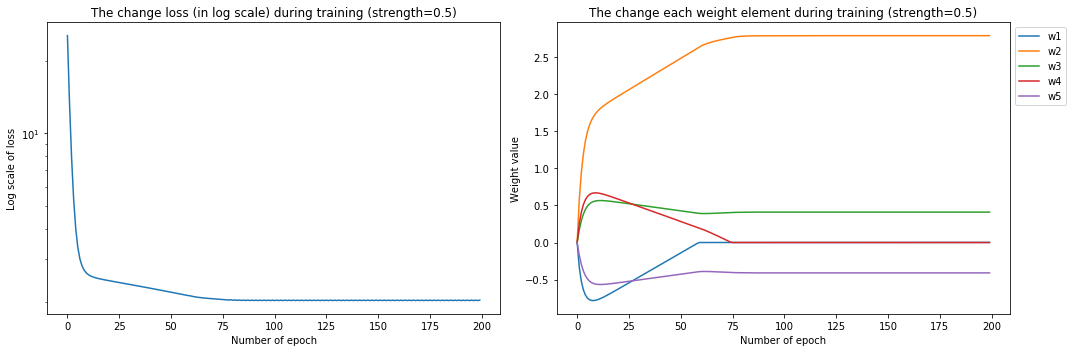

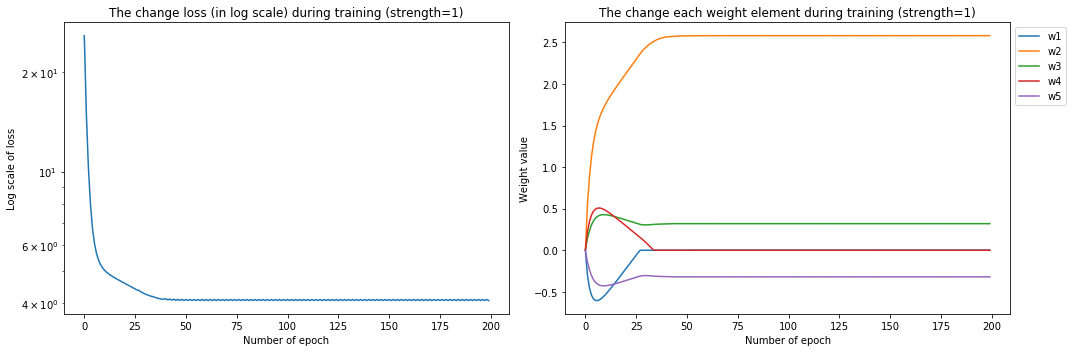

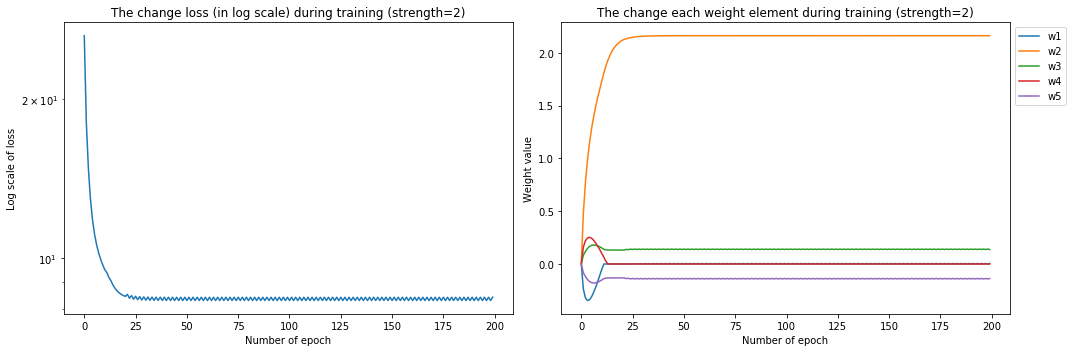

In [99]:
# Proximal l1 regularization

w = w0
lr = 0.02
loss_lst = []
w_lst = []
strength_lst = [0.2, 0.5, 1, 2]

for strength in strength_lst:
    w = w0
    lr = 0.02
    loss_lst = []
    w_lst = []
    for i in range(200):
        w_lst.append(w.ravel().tolist())
        total_loss = 0

        for inputs, labels in zip(x, y):
            pred = np.dot(inputs,w)
            grad = gradient_l1(pred, inputs, labels, w, strength)
            #print(grad)
            loss = loss_func_l1(pred, labels, strength, w)
            total_loss += loss
            w = optimizer(w, lr, grad.reshape(5,1))
            
            w_u = np.zeros(w.shape)
            for ind, w_i in zip(list(range(0,5)), w):
                w_i = proximal_l1(w_i, strength, lr)
                w_u[ind] = w_i
            w = w_u
            
        avg_loss = total_loss / len(x)
        loss_lst.append(avg_loss)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    cols = []

    axes[0].plot(np.array(range(200)), loss_lst)
    axes[0].set_xlabel('Number of epoch')
    axes[0].set_ylabel('Log scale of loss')
    axes[0].set_yscale('log')
    cols.append('The change loss (in log scale) during training (strength=' + str(strength) + ')')

    w_arr = np.array(w_lst)

    axes[1].plot(np.array(range(200)), w_arr[:,0], label='w1')
    axes[1].plot(np.array(range(200)), w_arr[:,1], label='w2')
    axes[1].plot(np.array(range(200)), w_arr[:,2], label='w3')
    axes[1].plot(np.array(range(200)), w_arr[:,3], label='w4')
    axes[1].plot(np.array(range(200)), w_arr[:,4], label='w5')
    axes[1].set_xlabel('Number of epoch')
    axes[1].set_ylabel('Weight value')
    axes[1].legend(bbox_to_anchor=(1, 1), loc='upper left')
    cols.append('The change each weight element during training (strength=' + str(strength) + ')')

    for ax1, col in zip(axes.ravel(), cols):
        ax1.set_title(col, fontsize=12)

    fig.tight_layout()
    plt.show()

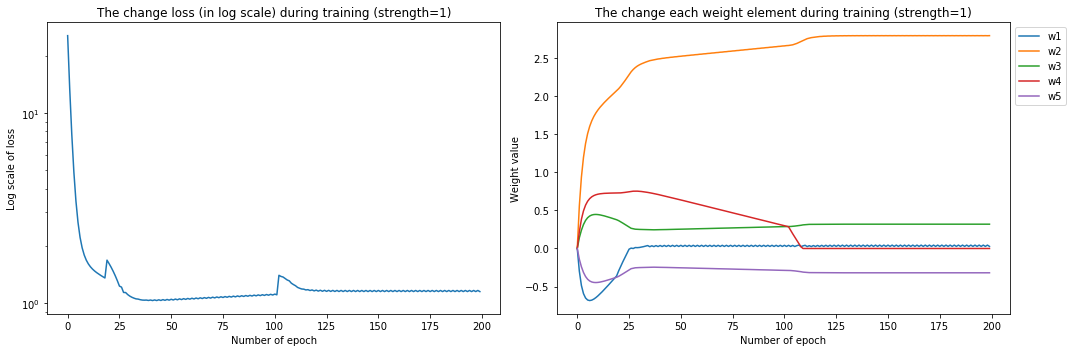

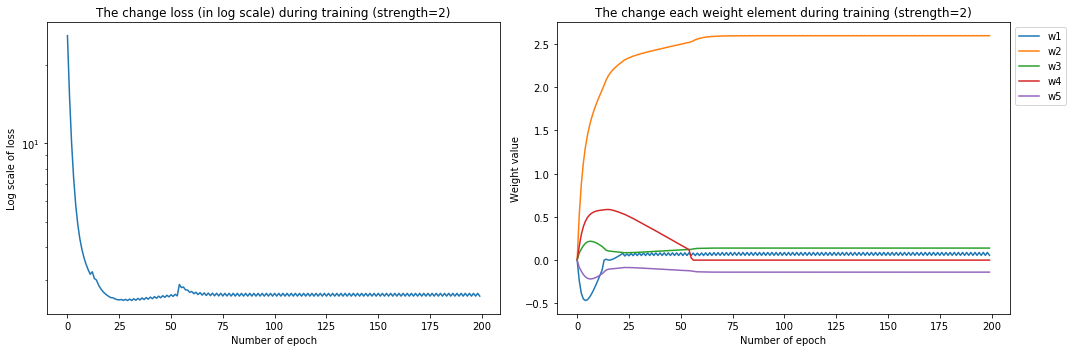

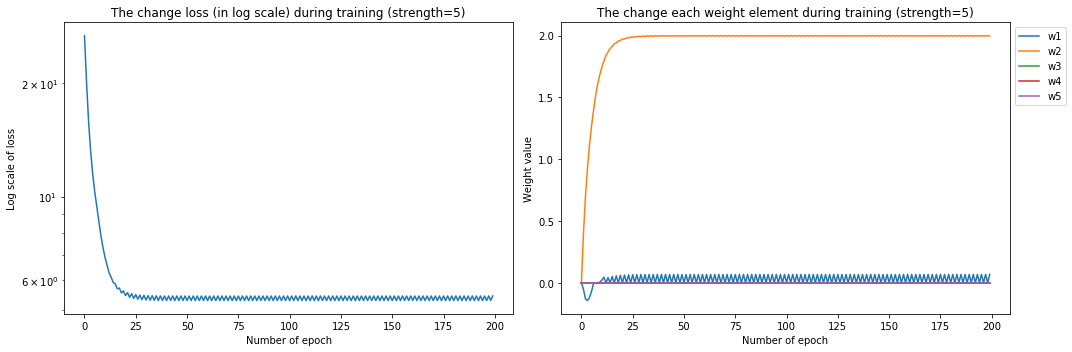

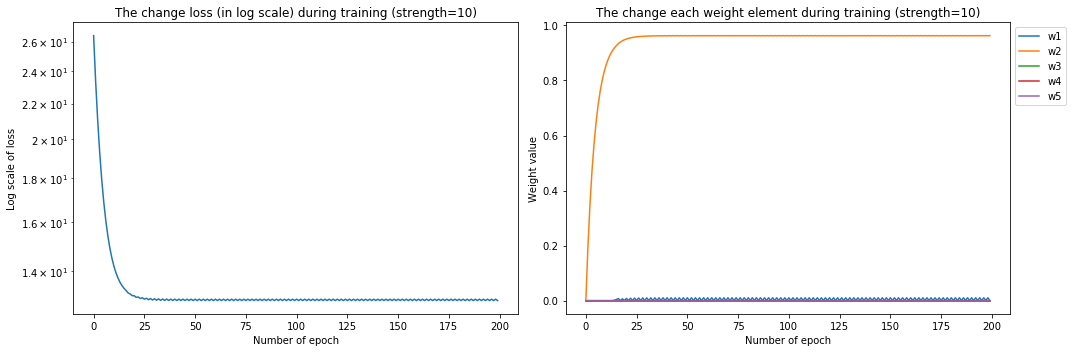

In [100]:
# Trim l1 regularization

w = w0
lr = 0.02
loss_lst = []
w_lst = []
strength_lst = [1, 2, 5, 10]

for strength in strength_lst:
    w = w0
    lr = 0.02
    loss_lst = []
    w_lst = []
    for i in range(200):
        w_lst.append(w.ravel().tolist())
        total_loss = 0

        for inputs, labels in zip(x, y):
            pred = np.dot(inputs, w)
            grad = gradient_trim_l1(pred, inputs, labels, w, strength)
            loss = loss_func_trim_l1(pred, labels, strength, w)
            total_loss += loss
            w = optimizer(w, lr, grad.reshape(5,1))

            w_u = np.zeros(w.shape)
            for ind, w_i in zip(list(range(0,5)), w):
                w_i = proximal_l1(w_i, strength, lr)
                w_u[ind] = w_i
            w = w_u

        avg_loss = total_loss / len(x)
        loss_lst.append(avg_loss)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    cols = []

    axes[0].plot(np.array(range(200)), loss_lst)
    axes[0].set_xlabel('Number of epoch')
    axes[0].set_ylabel('Log scale of loss')
    axes[0].set_yscale('log')
    cols.append('The change loss (in log scale) during training (strength=' + str(strength) + ')')

    w_arr = np.array(w_lst)

    axes[1].plot(np.array(range(200)), w_arr[:,0], label='w1')
    axes[1].plot(np.array(range(200)), w_arr[:,1], label='w2')
    axes[1].plot(np.array(range(200)), w_arr[:,2], label='w3')
    axes[1].plot(np.array(range(200)), w_arr[:,3], label='w4')
    axes[1].plot(np.array(range(200)), w_arr[:,4], label='w5')
    axes[1].set_xlabel('Number of epoch')
    axes[1].set_ylabel('Weight value')
    axes[1].legend(bbox_to_anchor=(1, 1), loc='upper left')
    cols.append('The change each weight element during training (strength=' + str(strength) + ')')

    for ax1, col in zip(axes.ravel(), cols):
        ax1.set_title(col, fontsize=12)

    fig.tight_layout()
    plt.show()